# 第14回　数理工学実験2

## 15 シミュレーションとデータ解析

ここでは，簡単なシミュレーションで得られたデータの解析を行う．シミュレーションを用いた研究を行う場合，しばしばシミュレーション時間に莫大な時間がかかり，その後のデータ解析にはそれほど計算時間がかからない場合がある．そのような場合には，シミュレーション結果を一旦ファイルへ出力し保存を行い，その後必要に応じてそのファイルを読み込みデータ解析を行う手順を取ることが多い．下記では単振動のシミュレーションを例に説明する．

$$
m \frac{\mathrm{d}^2 x}{\mathrm{d}t^2} = -kx
$$

上記は2階の線形常微分方程式なので，1階の2元連立1次の常微分方程式へ変換できる(簡単のため$m=1, k=1$とした)．

$$
 \frac{\mathrm{d} x}{\mathrm{d}t} &= v \\
 \frac{\mathrm{d} v}{\mathrm{d}t} &= -x
$$

この式を初期条件$t=0$の時，$x(0)=1, y(0)=0$の下でオイラー法を用いて数値的に解く．

[0.0000e+00 2.0000e-03 4.0000e-03 ... 1.9996e+01 1.9998e+01 2.0000e+01]
[1.         1.         0.999996   ... 0.42007117 0.41821177 0.41635069]


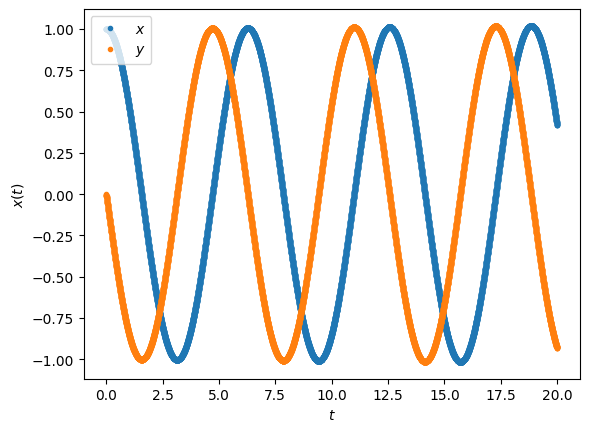

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

def euler2(t0, x0, y0, a, b, f1, f2, n):
    h=(b-a)/n
    #print(h)
    t=np.zeros(n+1)
    x=np.zeros(n+1)
    y=np.zeros(n+1)
    t[0]=t0
    x[0]=x0
    y[0]=y0
    #print(t0)
    for i in range(0,n):
        x[i+1] = x[i] + h*f1(t[i],x[i],y[i])
        y[i+1] = y[i] + h*f2(t[i],x[i],y[i])
        t[i+1] = t[i] + h

    return t, x, y
    
def func1(t, x, y):
    return y 

def func2(t, x, y):
    return -x

if __name__=='__main__':
    t0=0
    x0=1
    y0=0
    a=0
    b=20
    n=10000

    t, x3, y3=euler2(t0,x0,y0, a,b,func1, func2, n)
    print(t)
    print(x3)
    plt.plot(t,x3, marker=".", linestyle="", label="$x$")
    plt.plot(t,y3, marker=".", linestyle="", label="$y$")
    plt.xlabel('$t$')
    plt.ylabel('$x(t)$')
    plt.legend(loc='upper left')
    plt.show()

続いて，データの出力を行う．`numpy`，`pandas`のどちらにもデータの出力に関する関数（またはメソッド）が用意されているが，ここでは`numpy`で用意されている関数を用いることにする．

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

def euler2(t0, x0, y0, a, b, f1, f2, n):
    h=(b-a)/n
    #print(h)
    t=np.zeros(n+1)
    x=np.zeros(n+1)
    y=np.zeros(n+1)
    t[0]=t0
    x[0]=x0
    y[0]=y0
    
    #with open("euler02.txt", "a") as fp01:
    for i in range(0,n):
        x[i+1] = x[i] + h*f1(t[i],x[i],y[i])
        y[i+1] = y[i] + h*f2(t[i],x[i],y[i])
        t[i+1] = t[i] + h
    #        fp01.write("{} {} {}\n".format(t[i],x[i],y[i]))

    return t, x, y
    
def func1(t, x, y):
    return y 

def func2(t, x, y):
    return -x

if __name__=='__main__':
    t0=0
    x0=1
    y0=0
    a=0
    b=20
    n=10000

    t, x3, y3=euler2(t0,x0,y0, a,b,func1, func2, n)
    np.savetxt("../dat/euler01.txt",np.c_[t, x3, y3])

In [ ]:
%cat ../dat/euler01.txt

続いてファイルを読み込み，グラフを出力する．

[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 2.00000000e-03  1.00000000e+00 -2.00000000e-03]
 [ 4.00000000e-03  9.99996000e-01 -4.00000000e-03]
 ...
 [ 1.99960000e+01  4.20071168e-01 -9.29700263e-01]
 [ 1.99980000e+01  4.18211767e-01 -9.30540405e-01]
 [ 2.00000000e+01  4.16350686e-01 -9.31376829e-01]]


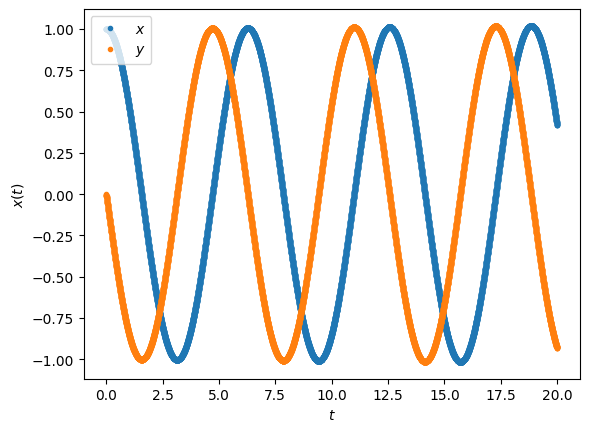

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

data01=np.loadtxt('../dat/euler01.txt')
print(data01)

t=data01[:,0]
x=data01[:,1]
y=data01[:,2]

plt.plot(t,x, marker=".", linestyle="", label="$x$")
plt.plot(t,y, marker=".", linestyle="", label="$y$")
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.legend(loc='upper left')
plt.show()

## 16 ネットワークの取り扱い

Pythonを用いてネットワークを取り扱う最も有名なモジュールは`networkx`である．また，`networkx`より高速（100倍程度）なネットワークのモジュールとして`graph-tool`がある．ここでは，最も有名な`networkx`を使いネットワークに関する数値計算手法を学ぶこととする．

### 16.1 ネットワークモジュール`networkx`の基本的な使い方

`networkx`ではネットワークをグラフオブジェクトとして扱います．

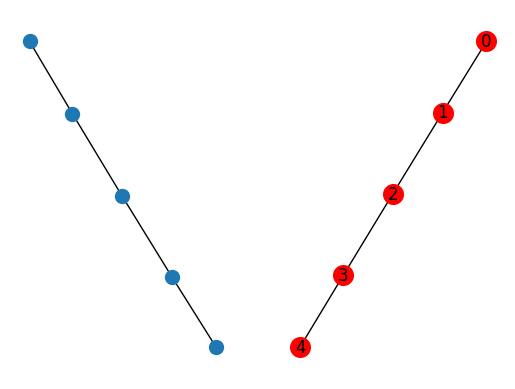

In [6]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

nodelist01=np.arange(5) #ノードのリスト
edgeslist01=np.array([(0,1), (1,2), (2,3),(3,4)])

G01=nx.Graph()
G01.add_nodes_from(nodelist01)
G01.add_edges_from(edgeslist01)
subax1=plt.subplot(121)
np.random.seed(1)
nx.draw(G01, node_size=100)
subax2=plt.subplot(122)
nx.draw(G01, node_size=200, with_labels=True, node_color='red')

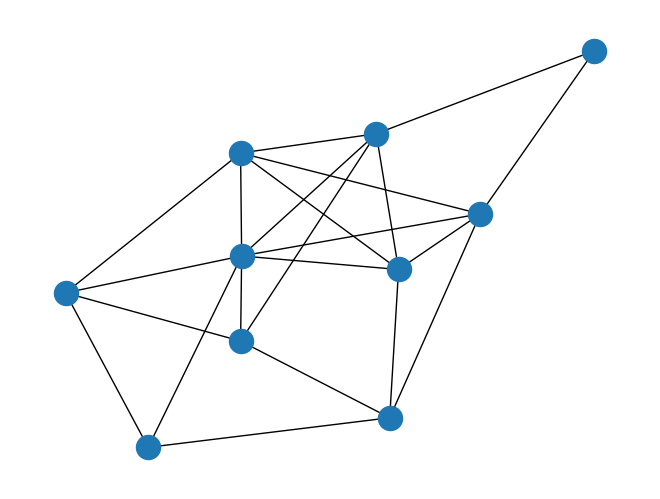

In [7]:
import numpy as np
import matplotlib.pyplot as plt

while True:
    G03 = nx.fast_gnp_random_graph(10, 0.5, 1)
    if nx.is_connected(G03): 
        break

np.random.seed(1)
nx.draw(G03)
#plt.plot()

nx.write_adjlist(G03, "../dat/test_adj.txt")
nx.write_edgelist(G03, "../dat/test_edge.txt", data=False)

np.savetxt("../dat/testG03_edge.txt", np.c_[nx.edges(G03)], fmt='%.0f')

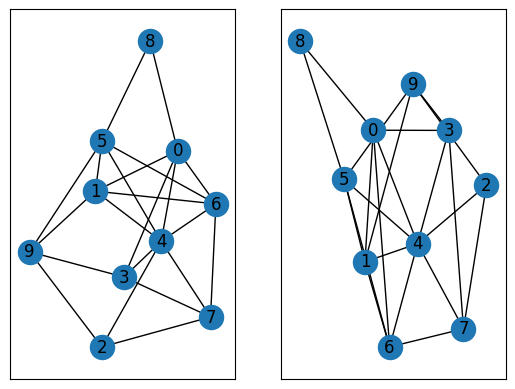

In [8]:
import numpy as np
import networkx as nx

G04=np.loadtxt("../dat/test_edge.txt")
G04=G04.astype('int64')
G04=nx.from_edgelist(G04)

#print(nx.info(G04))
#print(G04.nodes)

G05=nx.read_edgelist("../dat/test_edge.txt")
#print(type(G05))
pos1=nx.spring_layout(G04, seed=1)
pos2=nx.spring_layout(G05, seed=2)

subax1=plt.subplot(121)
nx.draw_networkx(G04, pos1, with_labels=True)
subax1=plt.subplot(122)
nx.draw_networkx(G05, pos2, with_labels=True)

In [9]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

G06=nx.read_edgelist("../dat/test_edge.txt")

#ネットワーク情報
print(nx.nodes(G06))
print(nx.number_of_nodes(G06))
print(nx.edges(G06))
print(nx.number_of_edges(G06))

['0', '1', '3', '4', '6', '8', '5', '9', '2', '7']
10
[('0', '1'), ('0', '3'), ('0', '4'), ('0', '6'), ('0', '8'), ('1', '4'), ('1', '5'), ('1', '6'), ('1', '9'), ('3', '4'), ('3', '7'), ('3', '9'), ('4', '2'), ('4', '5'), ('4', '6'), ('4', '7'), ('6', '5'), ('6', '7'), ('8', '5'), ('5', '9'), ('9', '2'), ('2', '7')]
22


In [10]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

G06=nx.read_edgelist("../dat/test_edge.txt")

adj_mat=nx.adjacency_matrix(G06)
#print(adj_mat)
print(adj_mat.todense())

[[0 1 1 1 1 1 0 0 0 0]
 [1 0 0 1 1 0 1 1 0 0]
 [1 0 0 1 0 0 0 1 0 1]
 [1 1 1 0 1 0 1 0 1 1]
 [1 1 0 1 0 0 1 0 0 1]
 [1 0 0 0 0 0 1 0 0 0]
 [0 1 0 1 1 1 0 1 0 0]
 [0 1 1 0 0 0 1 0 1 0]
 [0 0 0 1 0 0 0 1 0 1]
 [0 0 1 1 1 0 0 0 1 0]]


### 16.2 ネットワークを特徴づける統計量

ここでは，ネットワークを特徴づけるいくつかの統計量を紹介する．

#### 16.2.1 次数と次数分布

Degree= [('0', 5), ('1', 5), ('3', 4), ('4', 7), ('6', 5), ('8', 2), ('5', 5), ('9', 4), ('2', 3), ('7', 4)]
[0, 0, 1, 1, 3, 4, 0, 1]


<BarContainer object of 8 artists>

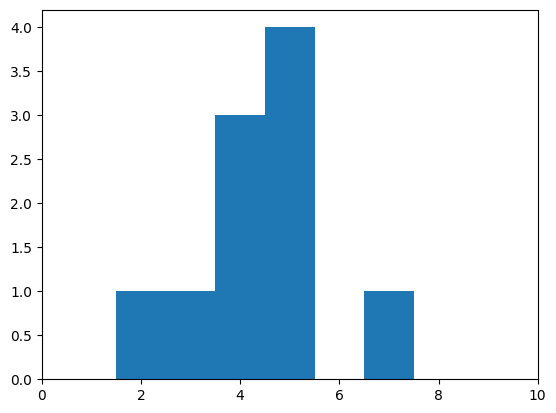

In [11]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

G06=nx.read_edgelist("../dat/test_edge.txt")

print('Degree=', nx.degree(G06))
print(nx.degree_histogram(G06))

G06_deg=nx.degree(G06)
G06_deg=dict(G06_deg)
G06_deg=G06_deg.values()

plt.xlim(0,10)
#plt.hist(G06_deg, density=True, bins=10)
plt.bar(range(8), height=nx.degree_histogram(G06), width=1)

#### 16.2.2 最短パスとネットワークの直径

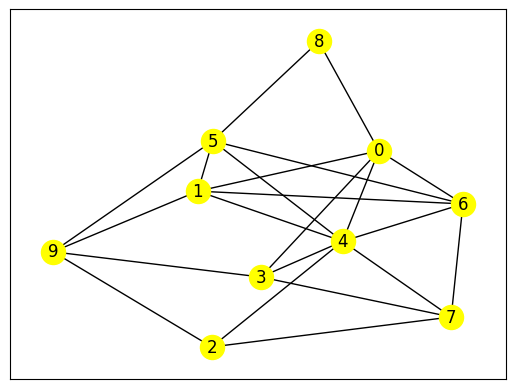

shortest path between 8 and 7: ['8', '0', '3', '7']
all shortest paths: ['8', '0', '3', '7']
all shortest paths: ['8', '0', '4', '7']
all shortest paths: ['8', '5', '4', '7']
all shortest paths: ['8', '0', '6', '7']
all shortest paths: ['8', '5', '6', '7']
shortest path length: 3
diameter: 3


In [12]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

G07=nx.read_edgelist("../dat/test_edge.txt")
pos1=nx.spring_layout(G07, seed=1)
nx.draw_networkx(G07, pos1, with_labels=True, node_color='yellow')
plt.show()
print("shortest path between 8 and 7:", nx.shortest_path(G07, "8", "7"))

for p in nx.all_shortest_paths(G07, '8', '7'):
    print('all shortest paths:', p)

print('shortest path length:', nx.shortest_path_length(G07, '8', '7'))
print('diameter:', nx.diameter(G07))

#### 16.2.4 グラフラプラシアン

L09: [[ 5 -1 -1 -1 -1 -1  0  0  0  0]
 [-1  5  0 -1 -1  0 -1 -1  0  0]
 [-1  0  4 -1  0  0  0 -1  0 -1]
 [-1 -1 -1  7 -1  0 -1  0 -1 -1]
 [-1 -1  0 -1  5  0 -1  0  0 -1]
 [-1  0  0  0  0  2 -1  0  0  0]
 [ 0 -1  0 -1 -1 -1  5 -1  0  0]
 [ 0 -1 -1  0  0  0 -1  4 -1  0]
 [ 0  0  0 -1  0  0  0 -1  3 -1]
 [ 0  0 -1 -1 -1  0  0  0 -1  4]] 

 L10: [[ 4 -1  0 -1 -1 -1  0  0  0  0]
 [-1  4  0 -1 -1  0 -1  0  0  0]
 [ 0  0  2  0  0  0  0 -1  0 -1]
 [-1 -1  0  4 -1  0 -1  0  0  0]
 [-1 -1  0 -1  4  0 -1  0  0  0]
 [-1  0  0  0  0  2 -1  0  0  0]
 [ 0 -1  0 -1 -1 -1  4  0  0  0]
 [ 0  0 -1  0  0  0  0  2 -1  0]
 [ 0  0  0  0  0  0  0 -1  2 -1]
 [ 0  0 -1  0  0  0  0  0 -1  2]]
eigenvalue of L09:[0.       8.297566 1.611022 7.115235 6.387978 5.981041 4.774719 2.885318
 3.255532 3.691588]
eigenvalue of L10:[-0.  4.  6.  5.  2. -0.  4.  5.  2.  2.]


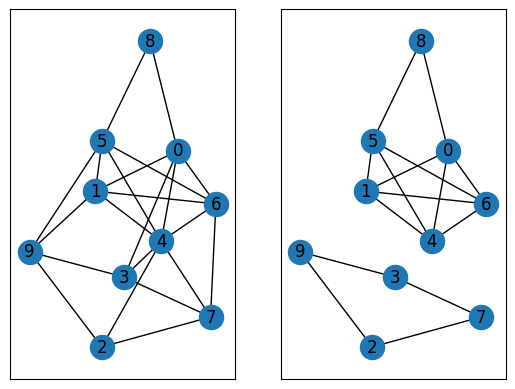

In [13]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

G09=nx.read_edgelist("../dat/test_edge.txt")
G10=G09.copy()
G10.remove_edges_from([('6','7'), ('4','7'), ('0','3'), ('3', '4'), ('9', '1'), ('9', '5'),('2', '4')])

L09=nx.laplacian_matrix(G09).todense()
L10=nx.laplacian_matrix(G10).todense()
print("L09:",L09,"\n\n","L10:",L10)

print("eigenvalue of L09:{}".format(np.round(np.linalg.eigvals(L09),6)))
print("eigenvalue of L10:{}".format(np.round(np.linalg.eigvals(L10)),6))

pos1=nx.spring_layout(G09, seed=1)
subax1=plt.subplot(121)
nx.draw_networkx(G09, pos1, with_labels=True)
subax1=plt.subplot(122)
nx.draw_networkx(G10, pos1, with_labels=True)

#### 16.2.5 次数相関

In [14]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

G11=nx.read_edgelist("../dat/test_edge.txt")

print("assortativity of G09:{}".format(nx.degree_pearson_correlation_coefficient(G11)))
print("neighbor connectivity of G09:{}".format(nx.average_degree_connectivity(G11)))

assortativity of G09:-0.09261744966442956
neighbor connectivity of G09:{5: 4.9, 4: 4.666666666666667, 7: 4.428571428571429, 2: 5.0, 3: 5.0}
